In [1]:
!pip install git+https://github.com/mzmmoazam/deep-viz-keras.git
  
!wget https://raw.githubusercontent.com/mzmmoazam/deep-viz-keras/master/images/doberman.png # download images for this demo

  Cloning https://github.com/mzmmoazam/deep-viz-keras.git to /tmp/pip-req-build-wfwu41n7
  Running command git clone -q https://github.com/mzmmoazam/deep-viz-keras.git /tmp/pip-req-build-wfwu41n7
  Stored in directory: /tmp/pip-ephem-wheel-cache-b2edbw7g/wheels/dd/5c/b1/897b240733ab8822467e8522eaba131ec4738b2a3eba09dda9
Successfully built saliency
--2019-05-03 09:34:11--  https://raw.githubusercontent.com/mzmmoazam/deep-viz-keras/master/images/doberman.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 95383 (93K) [image/png]
Saving to: ‘doberman.png’

doberman.png        100%[===================>]  93.15K  --.-KB/s    in 0.02s   

2019-05-03 09:34:11 (4.54 MB/s) - ‘doberman.png’ saved [95383/95383]



In [2]:
from keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt
import numpy as np
from saliency.utils import load_image,show_image

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
553467904/553467096 [==============================] - 6s 0us/step


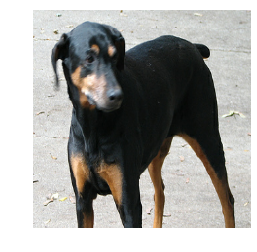

In [3]:
# Load and compile the model
model = VGG16(weights='imagenet')
model.compile(loss='mean_squared_error', optimizer='adam')

# Load an image and make the prediction
img_path = 'doberman.png'
img = load_image(img_path)
show_image(img, grayscale=False)

x = np.expand_dims(img, axis=0)

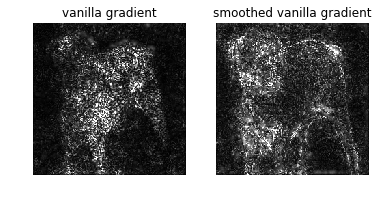

In [4]:
from saliency import GradientSaliency
vanilla = GradientSaliency(model)
mask = vanilla.get_mask(img)
show_image(mask, ax=plt.subplot('121'), title='vanilla gradient')

mask = vanilla.get_smoothed_mask(img)
show_image(mask, ax=plt.subplot('122'), title='smoothed vanilla gradient')

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /tmp/guided_backprop_ckpt


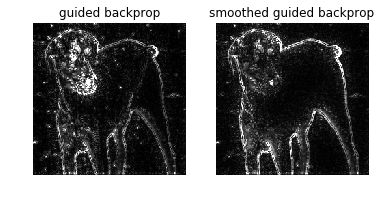

In [5]:
from saliency import GuidedBackprop
guided_bprop = GuidedBackprop(model) # A very expensive operation, which hackingly creates 2 new temp models

mask = guided_bprop.get_mask(img)
show_image(mask, ax=plt.subplot('121'), title='guided backprop')

mask = guided_bprop.get_smoothed_mask(x[0])
show_image(mask, ax=plt.subplot('122'), title='smoothed guided backprop')

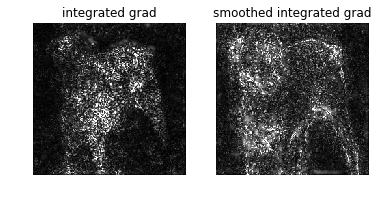

In [6]:
from saliency import IntegratedGradients
inter_grad = IntegratedGradients(model)

mask = inter_grad.get_mask(x[0])
show_image(mask, ax=plt.subplot('121'), title='integrated grad')

mask = inter_grad.get_smoothed_mask(x[0])
show_image(mask, ax=plt.subplot('122'), title='smoothed integrated grad')

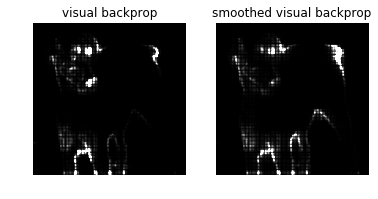

In [7]:
from saliency import VisualBackprop
visual_bprop = VisualBackprop(model)

mask = visual_bprop.get_mask(x[0])
show_image(mask, ax=plt.subplot('121'), title='visual backprop')

mask = visual_bprop.get_smoothed_mask(x[0])
show_image(mask, ax=plt.subplot('122'), title='smoothed visual backprop')


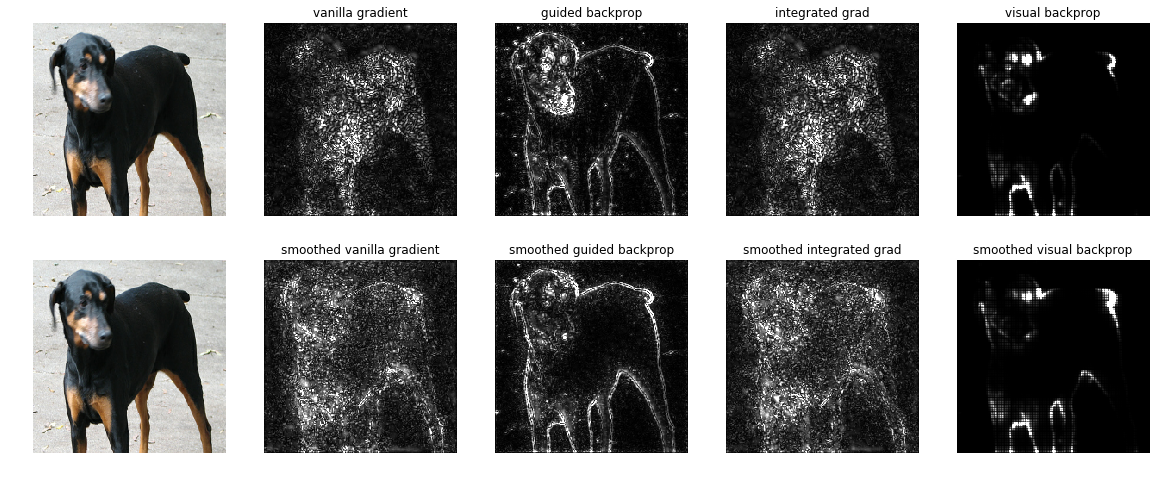

In [8]:
plt.figure(figsize=(20,8))

# Plot non-smoothed versions
show_image(img, grayscale=False, ax=plt.subplot(251))

mask = vanilla.get_mask(img)
show_image(mask, ax=plt.subplot(252), title='vanilla gradient')

mask = guided_bprop.get_mask(img)
show_image(mask, ax=plt.subplot(253), title='guided backprop')

mask = inter_grad.get_mask(x[0])
show_image(mask, ax=plt.subplot(254), title='integrated grad')

mask = visual_bprop.get_mask(x[0])
show_image(mask, ax=plt.subplot(255), title='visual backprop')

# Plot smoothed versions
show_image(img, grayscale=False, ax=plt.subplot(256))

mask = vanilla.get_smoothed_mask(img)
show_image(mask, ax=plt.subplot(257), title='smoothed vanilla gradient')

mask = guided_bprop.get_smoothed_mask(img)
show_image(mask, ax=plt.subplot(258), title='smoothed guided backprop')

mask = inter_grad.get_smoothed_mask(x[0])
show_image(mask, ax=plt.subplot(259), title='smoothed integrated grad')

mask = visual_bprop.get_smoothed_mask(x[0])
show_image(mask, ax=plt.subplot(2,5,10), title='smoothed visual backprop')